In [3]:
from alphaengine import stats, transforms, loaders

In [35]:
from tensorflow import keras
import tensorflow as tf

In [8]:
import numpy as np

In [5]:
gld = loaders.FileInstrument('../../../Developer/Data/prices/AMEX/GLD.csv')

In [6]:
perfect_strategy = gld['forward_returns'] > 0

In [11]:
back_returns = np.diff(gld['close'], prepend=gld['close'][0])

In [90]:
X = transforms.z_score(gld['close'], window_size=100)

In [91]:
X_window = transforms.rolling_window(X, window_size=100)

In [92]:
X_window.shape

(3952, 100)

In [93]:
Y = perfect_strategy.astype(int)

In [94]:
X_window_no_nan = X_window[200:]
Y_no_nan = Y[200:]

In [95]:
Y_no_nan.shape

(3752,)

In [96]:
idx = int(len(Y_no_nan) * 0.75)

In [97]:
X_train = np.expand_dims(X_window_no_nan[:idx], axis=1)
X_test = np.expand_dims(X_window_no_nan[idx:], axis=1)

Y_train = np.expand_dims(Y_no_nan[:idx], axis=1)
Y_test = np.expand_dims(Y_no_nan[idx:], axis=1)

In [122]:

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(200),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=tf.keras.metrics.BinaryAccuracy())
model.fit(X_train[:-1], Y_train[1:], epochs=10)

Epoch 1/10
88/88 [==============================] - 0s 3ms/step - loss: 0.7085 - binary_accuracy: 0.5101
Epoch 2/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6935 - binary_accuracy: 0.5322
Epoch 3/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6962 - binary_accuracy: 0.5318
Epoch 4/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6914 - binary_accuracy: 0.5339
Epoch 5/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6868 - binary_accuracy: 0.5411
Epoch 6/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6816 - binary_accuracy: 0.5645
Epoch 7/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6787 - binary_accuracy: 0.5546
Epoch 8/10
88/88 [==============================] - 0s 4ms/step - loss: 0.6804 - binary_accuracy: 0.5610
Epoch 9/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6739 - binary_accuracy: 0.5784
Epoch 10/10
88/88 [==============================] - 0s

In [123]:
scores = model.evaluate(X_test, Y_test, verbose=1)

30/30 [==============================] - 0s 1ms/step - loss: 0.7165 - binary_accuracy: 0.4904


In [124]:
preds = model.predict(X_test)

In [125]:
preds[:,0]

array([0.54255253, 0.5257939 , 0.5246915 , 0.5272112 , 0.5320928 ,
       0.503272  , 0.523825  , 0.5333819 , 0.55598813, 0.5806011 ,
       0.6121721 , 0.60804594, 0.60080427, 0.57967246, 0.5800069 ,
       0.5867235 , 0.57190686, 0.5968916 , 0.6293058 , 0.6531975 ,
       0.66365576, 0.64684904, 0.6605519 , 0.67593384, 0.6765717 ,
       0.69174695, 0.6781937 , 0.694283  , 0.7099786 , 0.6921246 ,
       0.6760838 , 0.6463569 , 0.66614044, 0.672839  , 0.6654117 ,
       0.6587542 , 0.64905643, 0.6548727 , 0.63338256, 0.5962857 ,
       0.56736284, 0.54199404, 0.53713536, 0.53734666, 0.53739756,
       0.5236165 , 0.5023517 , 0.50447005, 0.5048364 , 0.4919663 ,
       0.51413804, 0.5275453 , 0.54342663, 0.5501925 , 0.5237574 ,
       0.5241717 , 0.5406413 , 0.56036294, 0.5697383 , 0.55207556,
       0.53233373, 0.54034793, 0.524692  , 0.53415614, 0.51527506,
       0.51671505, 0.51116633, 0.5017539 , 0.5122224 , 0.53675663,
       0.5337533 , 0.56725276, 0.58545065, 0.6168521 , 0.61340

In [120]:
import matplotlib.pyplot as plt

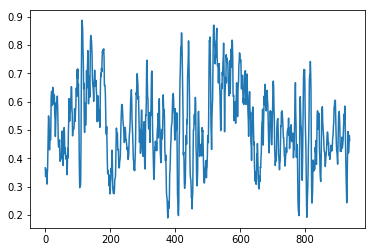

In [121]:
plt.plot(preds[:,0])